In [6]:

matrix = [
    [True, True, True, False, False, False, False],
    [True, False, True, False, False, False, False],
    [True, False, True, True, True, True, True],
    [True, False, True, False, False, False, True],
    [True, False, True, False, True, True, True],
    [True, False, True, False, True, False, False],
    [True, True, True, True, True, True, True],
]

start = (2, 2)
dest = (6, 6)

print("Matrix:")
print("\n".join("".join("O" if matrix[y][x] else "X" for x in range(len(matrix[0]))) for y in range(len(matrix))))

Matrix:
OOOXXXX
OXOXXXX
OXOOOOO
OXOXXXO
OXOXOOO
OXOXOXX
OOOOOOO


In [19]:
from typing import List, Tuple, Callable
import math
import heapq

Coord = Tuple[int, int]

# 방향 벡터
d_row = (-1, 0, 1, 0)
d_col = (0, 1, 0, -1)

def a_star(
    matrix: List[List[int]], start: Coord, dest: Coord
) -> Tuple[int, List[Coord]]:
    global d_row
    global d_col

    h = len(matrix)
    w = len(matrix[0])

    # 휴리스틱 코스트 테이블
    heuristic_cost = [[float("inf")] * w for _ in range(h)]

    # 휴리스틱 코스트 구하기
    for i in range(h):
        for j in range(w):
            if matrix[i][j]:
                heuristic_cost[i][j] = round(get_euclidean_distance((i, j), dest))
                
    row, col = start
    dest_y, dest_x = dest

    vis = [[False] * w for _ in range(h)]

    heap = []
    heapq.heappush(heap, (heuristic_cost[row][col] + 0, row, col))

    total_cost = 0
    # 어떤 노드에서 어떤 노드로 이동하는지 저장할 리스트
    came_from = []

    while heap and (row, col) != (dest_y, dest_x):
            total_cost, row, col = heapq.heappop(heap)

            # Total Cost 에서 휴리스틱 코스트를 빼면 시작 지점에서 현재 지점까지의 실제 거리를 구할 수 있음
            depth = total_cost - heuristic_cost[row][col]

            # 방문 처리
            vis[row][col] = True

            # 유효한 인접 노드가 있으면 코스트를 계산해 힙에 넣는다.
            for i in range(4):
                adjy = row + d_row[i]
                adjx = col + d_col[i]
                if is_vaild(matrix, vis, adjy, adjx):
                    total_cost = heuristic_cost[adjy][adjx] + depth + 1
                    came_from.append(((row, col), (adjy, adjx)))
                    heapq.heappush(heap, (total_cost, adjy, adjx))
    # came_from을 역순으로 추적하여 최단 경로를 찾음
    from_y, from_x = came_from[-1][0]
    paths = []

    for i in range(len(came_from) - 1, -1, -1):
        from_coord, to_coord = came_from[i]
        to_y, to_x = to_coord

        if from_y == to_y and from_x == to_x:
            from_y, from_x = from_coord
            paths.insert(0, to_coord)

    return total_cost, paths, vis, heuristic_cost

def get_euclidean_distance(pq1: Coord, pq2: Coord) -> float:
    p1, q1 = pq1
    p2, q2 = pq2

    return math.sqrt((p1 - p2) ** 2 + (q1 - q2) ** 2)


def is_vaild(matrix: List[List[int]], vis: List[List[bool]], row: int, col: int) -> bool:   
    h = len(matrix)
    w = len(matrix[0])

    return 0 <= row < h and 0 <= col < w and matrix[row][col] and not vis[row][col]

def _print_path(
    matrix: List[List[bool]], start: Coord, dest: Coord, title: str
) -> None:
    h = len(matrix)
    w = len(matrix[0])

    print(f"---- {title} ----")
    for i in range(h):
        for j in range(w):
            if (i, j) == start:
                print("S", end=" ")
            elif (i, j) == dest:
                print("G", end=" ")
            else:
                print("O" if matrix[i][j] else ".", end=" ")
        print()
    print()


_print_shortest_distance: Callable[
    [Coord, Coord, int], None
] = lambda start, dest, total_cost: print(f"{start} -> {dest} 최단 거리 : {total_cost}")

def _print_shortedst_path(
    matrix: List[List[bool]], paths: List[Coord], start: Coord, dest: Coord
) -> None:
    h = len(matrix)
    w = len(matrix[0])
    matrix = [["."] * w for _ in range(h)]

    for i in range(h):
        for j in range(w):
            if (i, j) == start:
                matrix[i][j] = "S"
            elif (i, j) == dest:
                matrix[i][j] = "G"

    prev_y, prev_x = start
    for path in paths:
        cur_y, cur_x = path
        # 해당 방향으로 화살표를 그림
        if prev_y < cur_y:
            matrix[cur_y][cur_x] = "↓"
        elif prev_y > cur_y:
            matrix[cur_y][cur_x] = "↑"
        elif prev_x < cur_x:
            matrix[cur_y][cur_x] = "→"
        elif prev_x > cur_x:
            matrix[cur_y][cur_x] = "←"

        prev_y, prev_x = cur_y, cur_x

    print("-- Shortest Path --")
    for i in range(h):
        for j in range(w):
            print(matrix[i][j], end=" ")
        print()
    print()


a_star_result = a_star(matrix, start, dest)
_print_shortest_distance(start, dest, a_star_result[0])
_print_shortedst_path(matrix, a_star_result[1], start, dest)
_print_path(matrix, start, dest, "Result")



(2, 2) -> (6, 6) 최단 거리 : 8
-- Shortest Path --
. . . . . . . 
. . . . . . . 
. . S . . . . 
. . ↓ . . . . 
. . ↓ . . . . 
. . ↓ . . . . 
. . ↓ → → → G 

---- Result ----
O O O . . . . 
O . O . . . . 
O . S O O O O 
O . O . . . O 
O . O . O O O 
O . O . O . . 
O O O O O O G 



# RTT

In [20]:
import math
import random

import matplotlib.pyplot as plt
import numpy as np

show_animation = True


start 


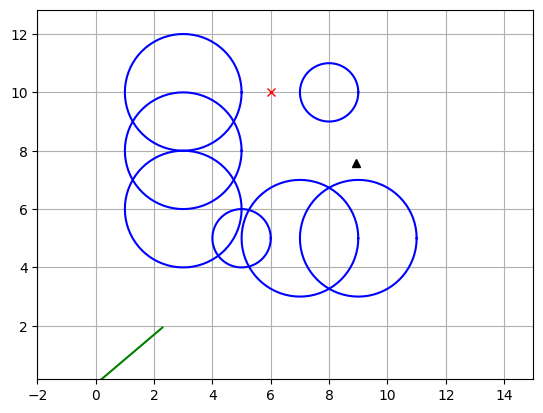

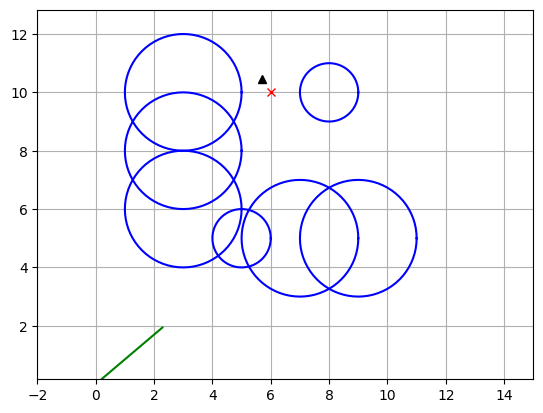

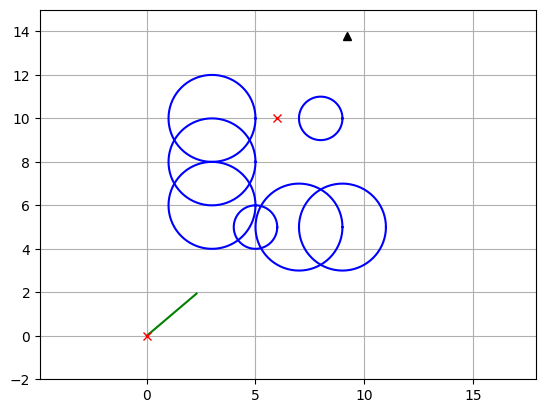

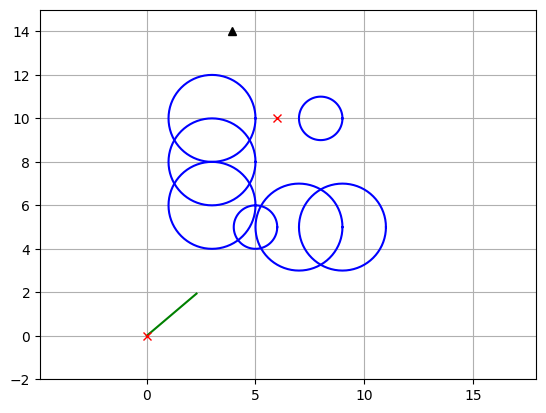

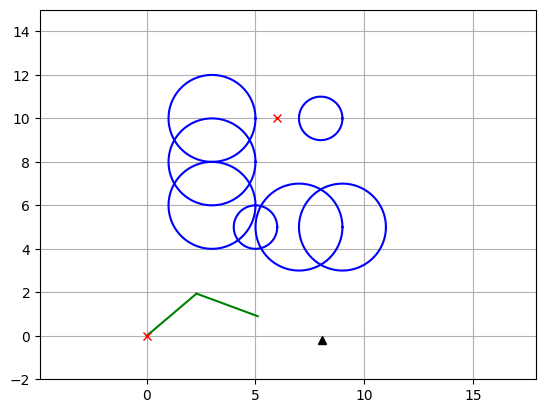

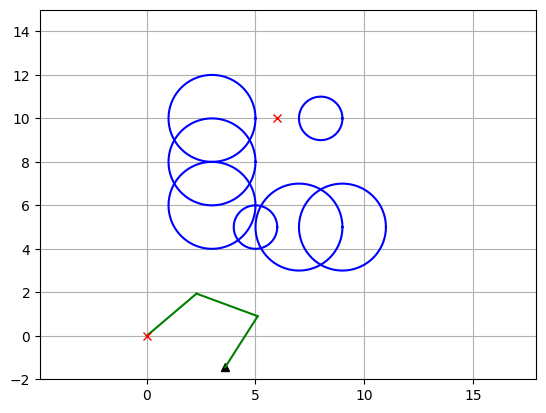

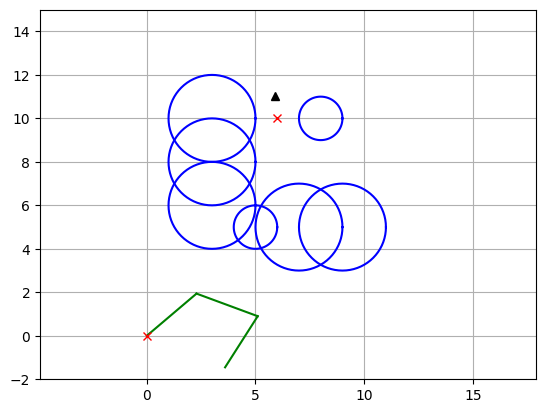

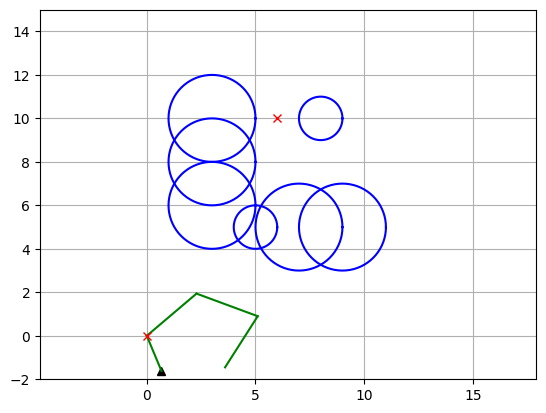

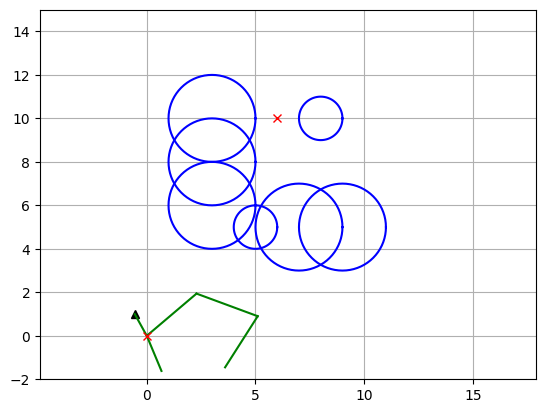

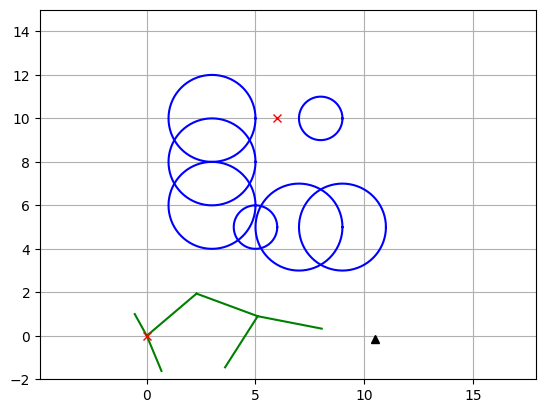

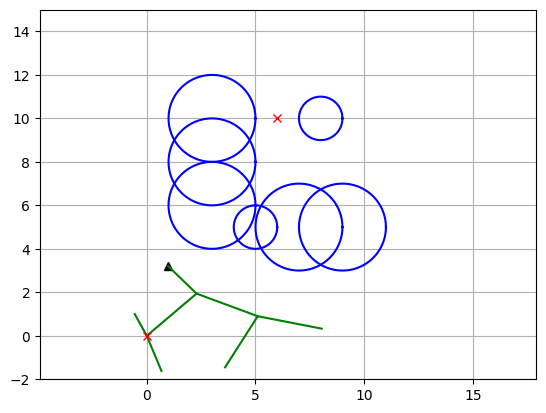

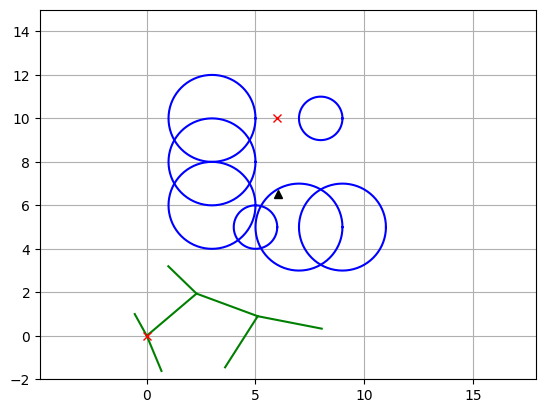

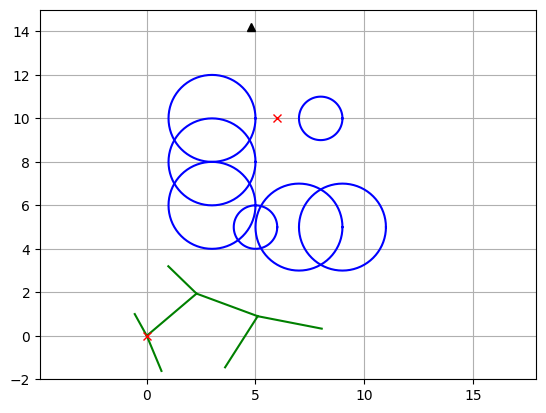

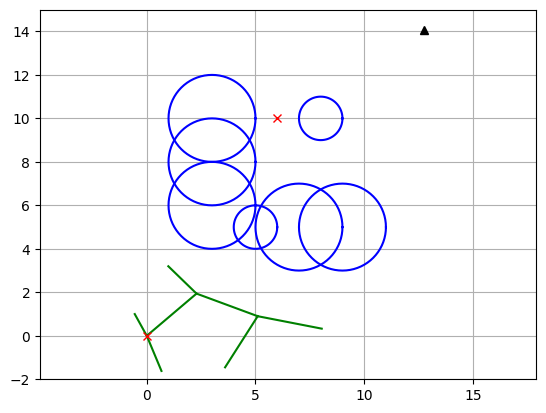

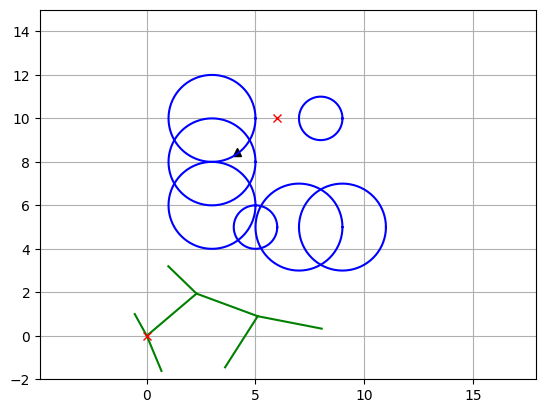

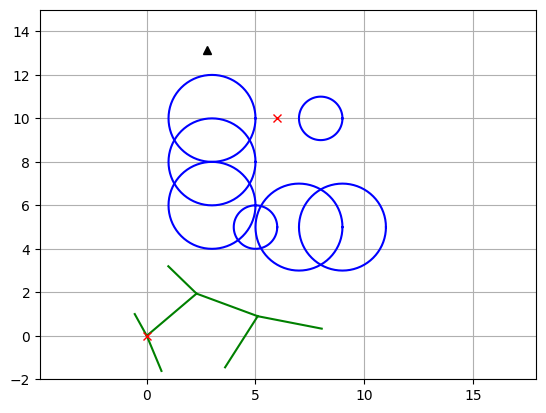

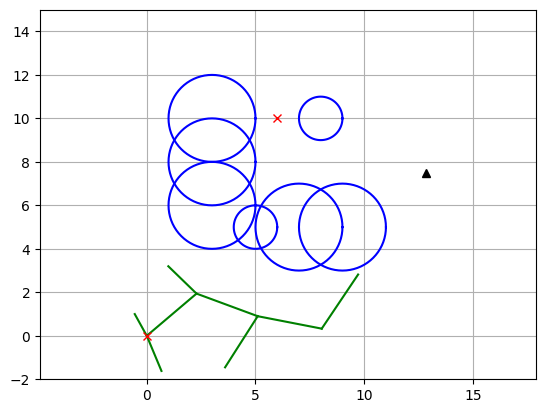

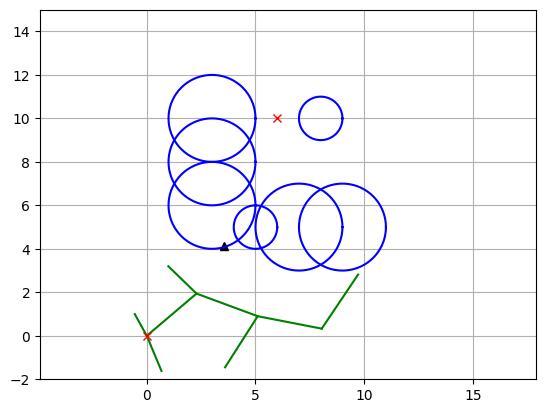

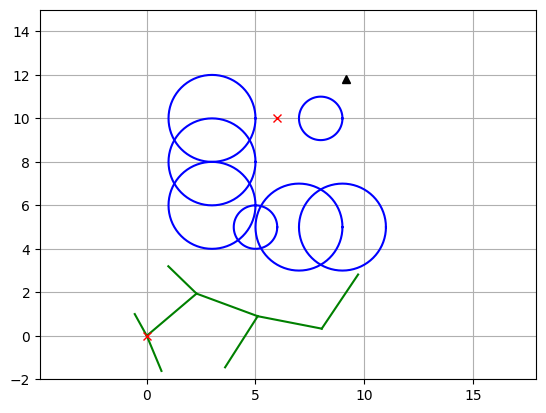

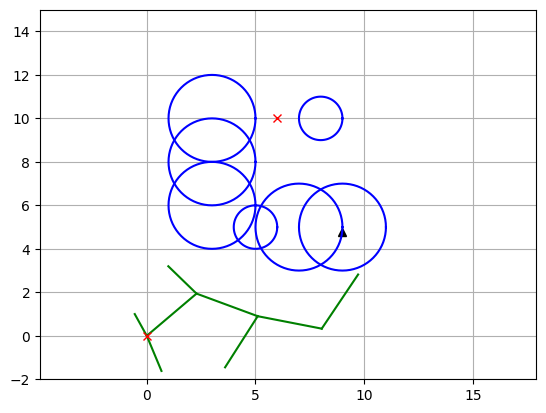

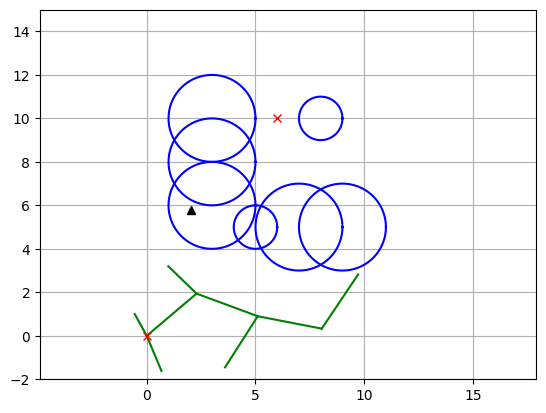

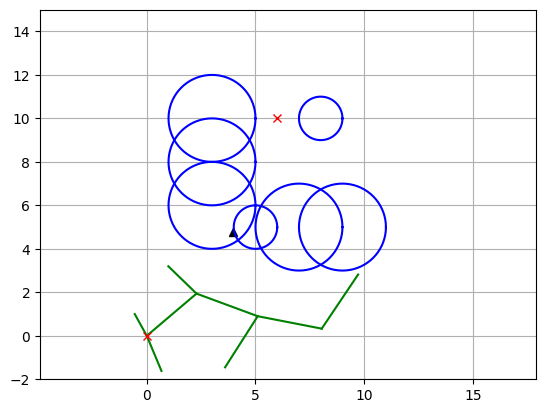

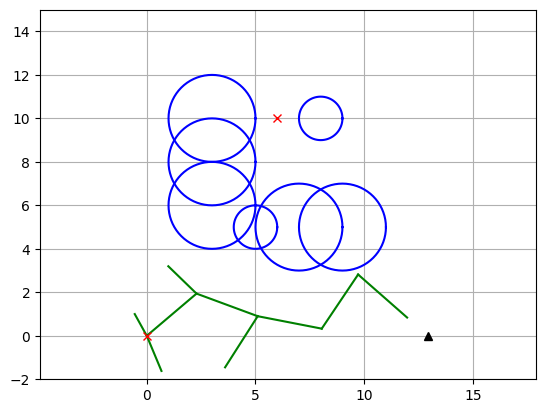

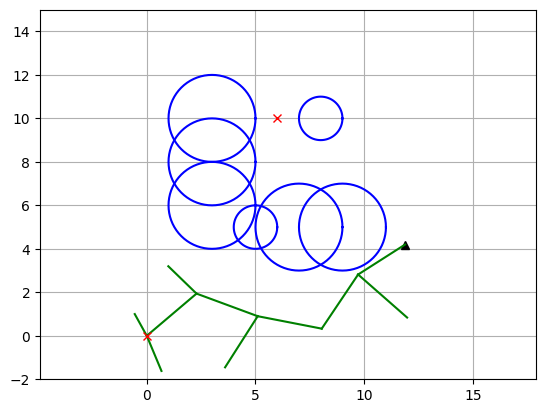

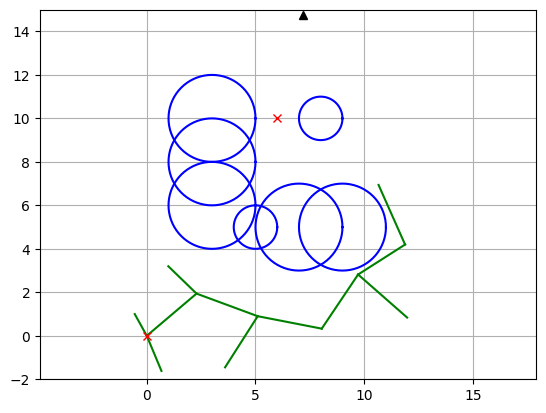

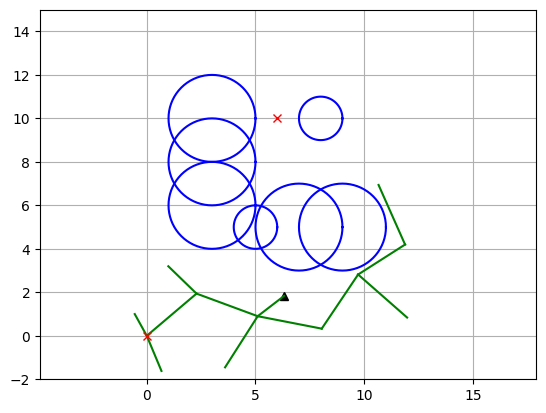

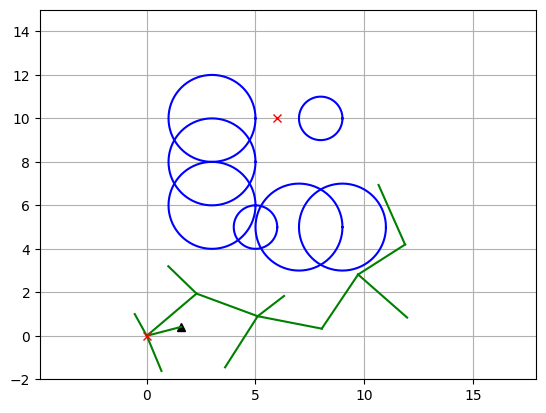

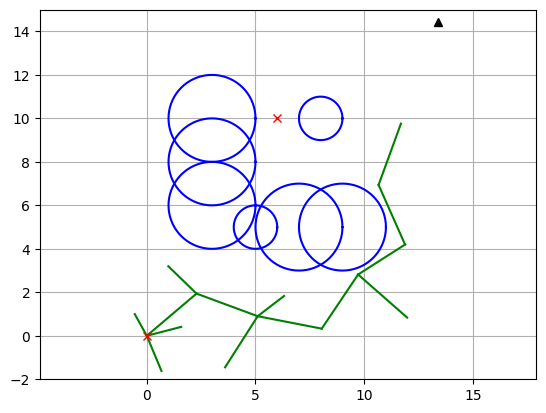

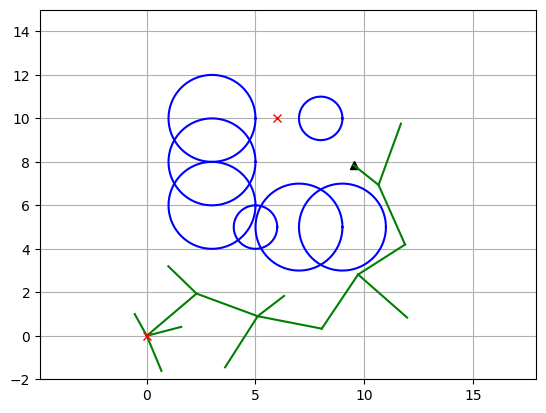

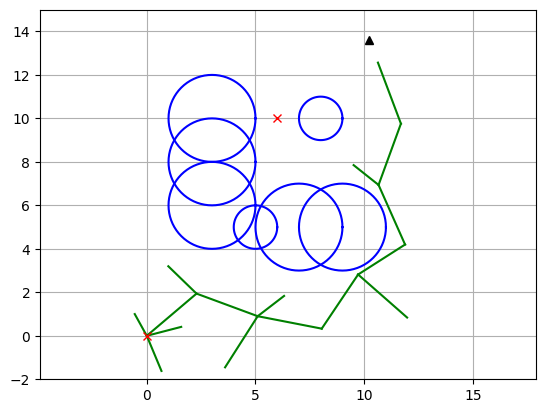

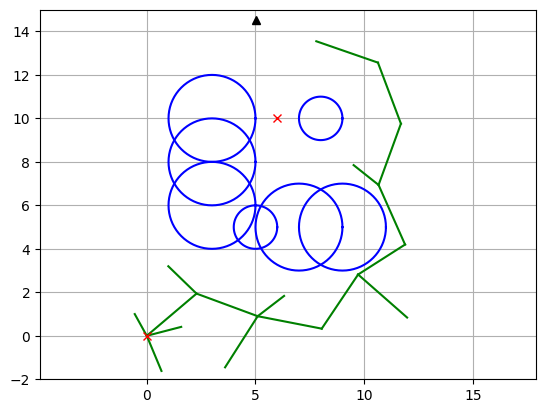

found path!!


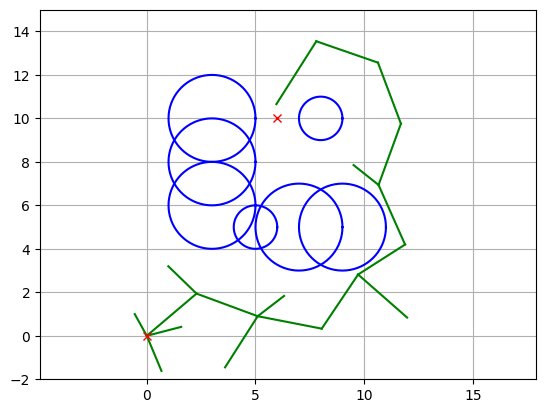

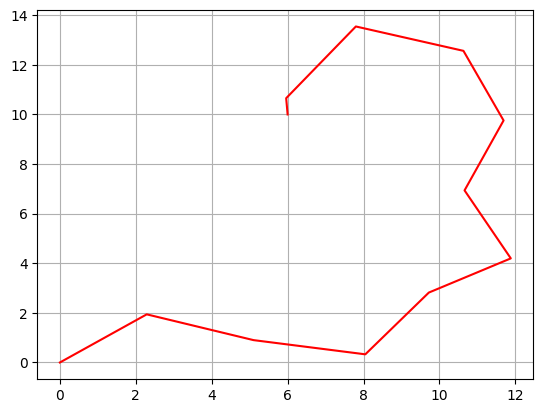

In [ ]:
class RRT:
    """
    Class for RRT planning
    """

    class Node:
        """
        RRT Node
        """
        def __init__(self, x, y):
            self.x = x
            self.y = y
            self.path_x = []
            self.path_y = []
            self.parent = None

    class AreaBounds:
        def __init__(self, area):
            self.xmin = float(area[0])
            self.xmax = float(area[1])
            self.ymin = float(area[2])
            self.ymax = float(area[3])

    def __init__(self,
                start,
                goal,
                obstacle_list,
                rand_area,
                expand_dis=3.0,
                path_resolution=0.5,
                goal_sample_rate=5,
                max_iter=500,
                play_area=None
                ):
        self.start = self.Node(start[0], start[1])
        self.end = self.Node(goal[0], goal[1])
        self.min_rand = rand_area[0]
        self.max_rand = rand_area[1]
        if play_area is not None:
            self.play_area = self.AreaBounds(play_area)
        else:
            self.play_area = None
        self.expand_dis = expand_dis
        self.path_resolution = path_resolution
        self.goal_sample_rate = goal_sample_rate
        self.max_iter = max_iter
        self.obstacle_list = obstacle_list
        self.node_list = []
    
    def planning(self, animation=True):
        """
        rrt path planning

        animation: flag for animation on or off
        """

        self.node_list = [self.start]
        for i in range(self.max_iter):
            rnd_node = self.get_random_node()
            nearest_ind = self.get_nearest_node_index(self.node_list, rnd_node)
            nearest_node = self.node_list[nearest_ind]

            new_node = self.steer(nearest_node, rnd_node, self.expand_dis)

            if self.check_if_outside_play_area(new_node, self.play_area) and \
            self.check_collision(new_node, self.obstacle_list):
                self.node_list.append(new_node)

            if animation and i % 5 == 0:
                self.draw_graph(rnd_node)

            if self.calc_dist_to_goal(self.node_list[-1].x,
                                    self.node_list[-1].y) <= self.expand_dis:
                final_node = self.steer(self.node_list[-1], self.end,
                                        self.expand_dis)
                if self.check_collision(final_node, self.obstacle_list):
                    return self.generate_final_course(len(self.node_list) - 1)

            if animation and i % 5:
                self.draw_graph(rnd_node)

        return None  # cannot find path

    def steer(self, from_node, to_node, extend_length=float("inf")):

        new_node = self.Node(from_node.x, from_node.y)
        d, theta = self.calc_distance_and_angle(new_node, to_node)

        new_node.path_x = [new_node.x]
        new_node.path_y = [new_node.y]

        if extend_length > d:
            extend_length = d

        n_expand = math.floor(extend_length / self.path_resolution)

        for _ in range(n_expand):
            new_node.x += self.path_resolution * math.cos(theta)
            new_node.y += self.path_resolution * math.sin(theta)
            new_node.path_x.append(new_node.x)
            new_node.path_y.append(new_node.y)

        d, _ = self.calc_distance_and_angle(new_node, to_node)
        if d <= self.path_resolution:
            new_node.path_x.append(to_node.x)
            new_node.path_y.append(to_node.y)
            new_node.x = to_node.x
            new_node.y = to_node.y

        new_node.parent = from_node

        return new_node
    
    def generate_final_course(self, goal_ind):
        path = [[self.end.x, self.end.y]]
        node = self.node_list[goal_ind]
        while node.parent is not None:
            path.append([node.x, node.y])
            node = node.parent
        path.append([node.x, node.y])

        return path

    def calc_dist_to_goal(self, x, y):
        dx = x - self.end.x
        dy = y - self.end.y
        return math.hypot(dx, dy)

    def get_random_node(self):
        if random.randint(0, 100) > self.goal_sample_rate:
            rnd = self.Node(
                random.uniform(self.min_rand, self.max_rand),
                random.uniform(self.min_rand, self.max_rand))
        else:  # goal point sampling
            rnd = self.Node(self.end.x, self.end.y)
        return rnd
    
    def draw_graph(self, rnd=None):
        plt.clf()
        # for stopping simulation with the esc key.
        plt.gcf().canvas.mpl_connect(
            'key_release_event',
            lambda event: [exit(0) if event.key == 'escape' else None])
        if rnd is not None:
            plt.plot(rnd.x, rnd.y, "^k")
        for node in self.node_list:
            if node.parent:
                plt.plot(node.path_x, node.path_y, "-g")

        for (ox, oy, size) in self.obstacle_list:
            self.plot_circle(ox, oy, size)

        if self.play_area is not None:
            plt.plot([self.play_area.xmin, self.play_area.xmax,
                      self.play_area.xmax, self.play_area.xmin,
                      self.play_area.xmin],
                     [self.play_area.ymin, self.play_area.ymin,
                      self.play_area.ymax, self.play_area.ymax,
                      self.play_area.ymin],
                     "-k")

        plt.plot(self.start.x, self.start.y, "xr")
        plt.plot(self.end.x, self.end.y, "xr")
        plt.axis("equal")
        plt.axis([-2, 15, -2, 15])
        plt.grid(True)
        plt.pause(0.01)

    @staticmethod
    def plot_circle(x, y, size, color="-b"):  # pragma: no cover
        deg = list(range(0, 360, 5))
        deg.append(0)
        xl = [x + size * math.cos(np.deg2rad(d)) for d in deg]
        yl = [y + size * math.sin(np.deg2rad(d)) for d in deg]
        plt.plot(xl, yl, color)

    @staticmethod
    def get_nearest_node_index(node_list, rnd_node):
        dlist = [(node.x - rnd_node.x)**2 + (node.y - rnd_node.y)**2
                for node in node_list]
        minind = dlist.index(min(dlist))

        return minind

    @staticmethod
    def check_if_outside_play_area(node, play_area):

        if play_area is None:
            return True  # no play_area was defined, every pos should be ok

        if node.x < play_area.xmin or node.x > play_area.xmax or \
        node.y < play_area.ymin or node.y > play_area.ymax:
            return False  # outside - bad
        else:
            return True  # inside - ok
    @staticmethod
    def check_collision(node, obstacleList):

        if node is None:
            return False

        for (ox, oy, size) in obstacleList:
            dx_list = [ox - x for x in node.path_x]
            dy_list = [oy - y for y in node.path_y]
            d_list = [dx * dx + dy * dy for (dx, dy) in zip(dx_list, dy_list)]

            if min(d_list) <= size**2:
                return False  # collision

        return True  # safe

    @staticmethod
    def calc_distance_and_angle(from_node, to_node):
        dx = to_node.x - from_node.x
        dy = to_node.y - from_node.y
        d = math.hypot(dx, dy)
        theta = math.atan2(dy, dx)
        return d, theta
    
def main(gx=6.0, gy=10.0):
    print("start " )

    # ====Search Path with RRT====
    obstacleList = [(5, 5, 1), (3, 6, 2), (3, 8, 2), (3, 10, 2), (7, 5, 2),
                    (9, 5, 2), (8, 10, 1)]  # [x, y, radius]
    # Set Initial parameters
    rrt = RRT(
        start=[0, 0],
        goal=[gx, gy],
        rand_area=[-2, 15],
        obstacle_list=obstacleList,
        # play_area=[0, 10, 0, 14]
        )
    path = rrt.planning(animation=show_animation)

    if path is None:
        print("Cannot find path")
    else:
        print("found path!!")

        # Draw final path
        if show_animation:
            rrt.draw_graph()
            plt.plot([x for (x, y) in path], [y for (x, y) in path], '-r')
            plt.grid(True)
            plt.pause(0.01)  # Need for Mac
            plt.show()


main()
